In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

"--------------Business Problem: Estimate the price of Houses-----------"

In [ ]:

dataTrain = pd.read_csv('Housing.csv')
dataTrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [ ]:
type(dataTrain)  #data type

pandas.core.frame.DataFrame

In [ ]:
dataTrain.shape # check dimension

(545, 13)

In [ ]:
dataTrain = dataTrain.dropna()

In [ ]:
dataTrain.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [ ]:
dataTrain.shape # 15 rows removed

(545, 13)

In [ ]:
dataTrain.dtypes  # checking the data type of every column

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
price                int64
dtype: object

In [ ]:
dataTrain.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
dataTrain.loc[dataTrain.duplicated()]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price


In [ ]:
categorical_list = [x for x in dataTrain.columns if dataTrain[x].dtype =='object']

In [ ]:
for x in categorical_list: print(x)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


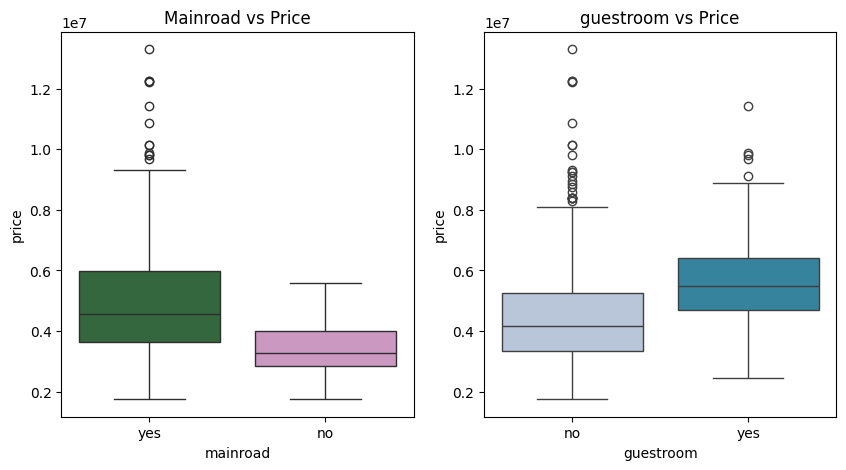

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Mainroad vs Price')
sns.boxplot(x=dataTrain.mainroad, y=dataTrain.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('guestroom vs Price')
sns.boxplot(x=dataTrain.guestroom, y=dataTrain.price, palette=("PuBuGn"))

plt.show()

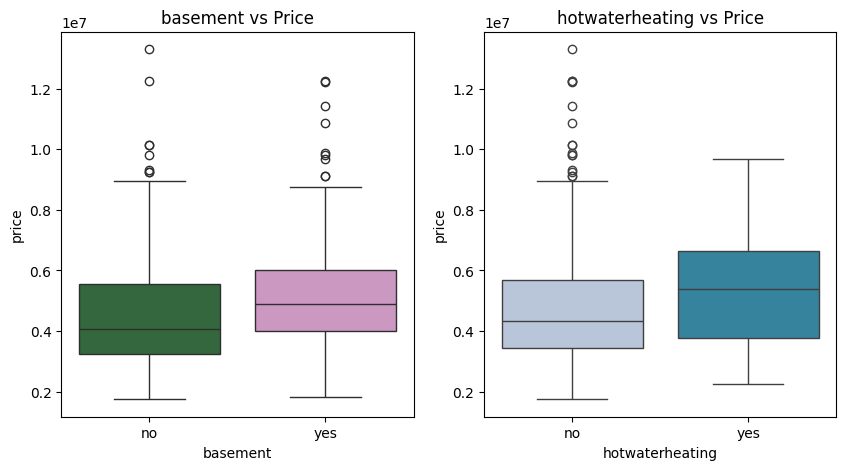

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('basement vs Price')
sns.boxplot(x=dataTrain.basement, y=dataTrain.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('hotwaterheating vs Price')
sns.boxplot(x=dataTrain.hotwaterheating, y=dataTrain.price, palette=("PuBuGn"))

plt.show()

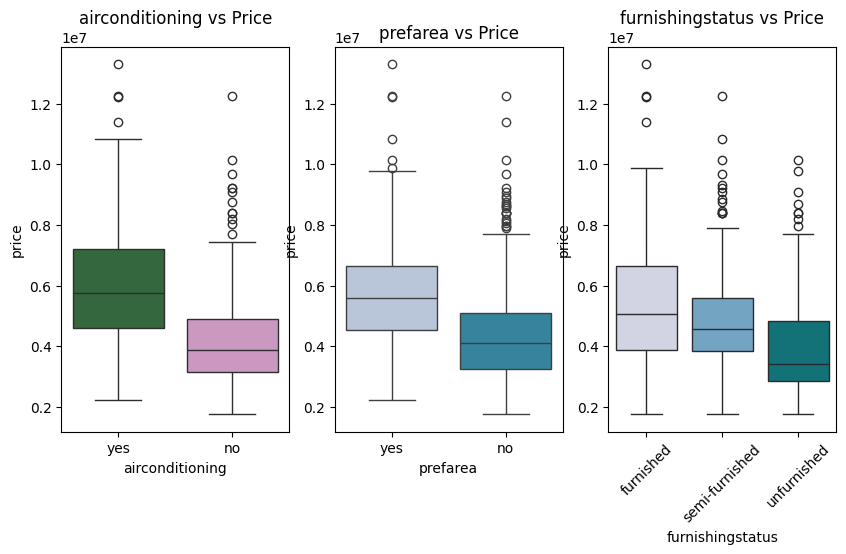

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title('airconditioning vs Price')
sns.boxplot(x=dataTrain.airconditioning, y=dataTrain.price, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('prefarea vs Price')
sns.boxplot(x=dataTrain.prefarea, y=dataTrain.price, palette=("PuBuGn"))

plt.subplot(1,3,3)
plt.title('furnishingstatus vs Price')
sns.boxplot(x=dataTrain.furnishingstatus, y=dataTrain.price, palette=("PuBuGn"))
plt.xticks(rotation=45)

plt.show()

In [ ]:
numerical_list = [x for x in dataTrain.columns if dataTrain[x].dtype in ('int64','float64')]
print(numerical_list)

['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


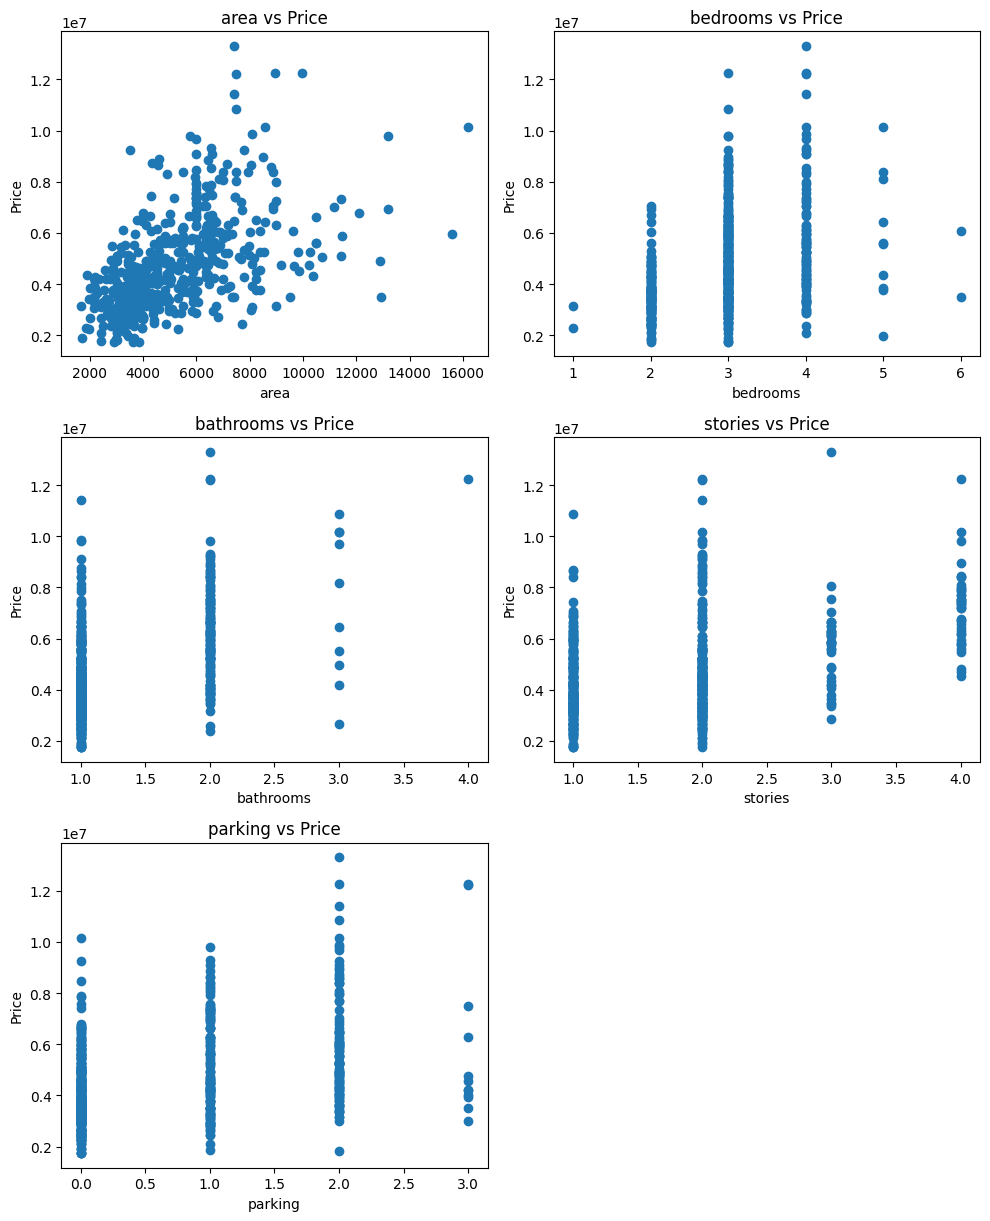

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(dataTrain[x],dataTrain['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['area'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5359973457780801  with a P-value of P = 7.388225401521874e-42


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['bedrooms'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.36649402577386847  with a P-value of P = 9.080301855811585e-19


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['bathrooms'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5175453394550112  with a P-value of P = 1.1393218375124884e-38


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['stories'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4207123661886167  with a P-value of P = 8.668397383952869e-25


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['parking'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3843936486357264  with a P-value of P = 1.2383784426342127e-20


In [ ]:
numerical_columns = ['area','bedrooms','bathrooms','stories','parking','price']

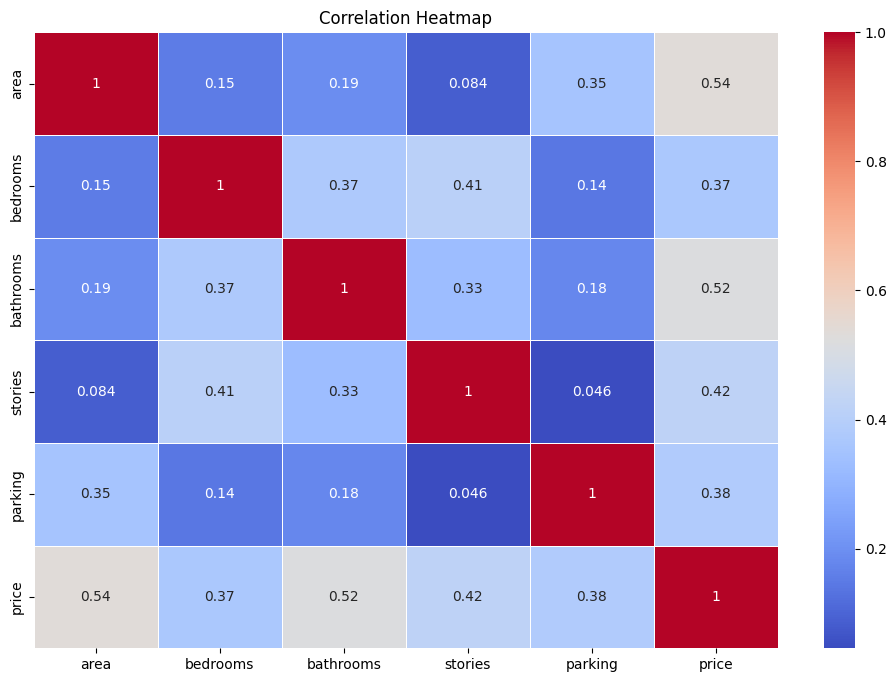

In [ ]:
cor_matrix= dataTrain[numerical_list].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
dataTrain.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
count,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,545.000000,545.000000,5.450000e+02,5.450000e+02
mean,-1.564498e-16,-1.825247e-16,-2.607496e-17,-1.303748e-16,-1.825247e-16,5.214993e-17,-7.822489e-17,-6.518741e-18,-5.214993e-17,0.000000,0.000000,1.825247e-16,2.085997e-16
std,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919,1.000919,1.000919e+00,1.000919e+00
min,-1.614530e+00,-2.665004e+00,-5.701867e-01,-9.293967e-01,-2.465344e+00,-4.653148e-01,-7.345393e-01,-2.192645e-01,-6.790626e-01,-0.805741,-0.554035,-1.406286e+00,-1.614327e+00
25%,-7.151451e-01,-1.308863e+00,-5.701867e-01,-9.293967e-01,4.056229e-01,-4.653148e-01,-7.345393e-01,-2.192645e-01,-6.790626e-01,-0.805741,-0.554035,-1.406286e+00,-7.153170e-01
50%,-2.539222e-01,4.727831e-02,-5.701867e-01,2.244101e-01,4.056229e-01,-4.653148e-01,-7.345393e-01,-2.192645e-01,-6.790626e-01,-0.805741,-0.554035,-9.166185e-02,-2.283534e-01
75%,5.578300e-01,4.727831e-02,1.421812e+00,2.244101e-01,4.056229e-01,-4.653148e-01,1.361397e+00,-2.192645e-01,1.472618e+00,0.355976,-0.554035,1.222962e+00,5.208214e-01
max,5.096263e+00,4.115701e+00,5.405809e+00,2.532024e+00,4.056229e-01,2.149083e+00,1.361397e+00,4.560702e+00,1.472618e+00,2.679409,1.804941,1.222962e+00,4.566365e+00


Data Transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.mainroad = labelencoder.fit_transform(dataTrain.mainroad)
dataTrain.guestroom = labelencoder.fit_transform(dataTrain.guestroom)
dataTrain.basement = labelencoder.fit_transform(dataTrain.basement)
dataTrain.hotwaterheating = labelencoder.fit_transform(dataTrain.hotwaterheating)
dataTrain.airconditioning = labelencoder.fit_transform(dataTrain.airconditioning)
dataTrain.prefarea = labelencoder.fit_transform(dataTrain.prefarea)
dataTrain.furnishingstatus = labelencoder.fit_transform(dataTrain.furnishingstatus)

In [ ]:
dataTrain.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,0,1,2,1,0,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,0,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,1,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,0,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,0,11410000
5,7500,3,3,1,1,0,1,0,1,2,1,1,10850000
6,8580,4,3,4,1,0,0,0,1,2,1,1,10150000
7,16200,5,3,2,1,0,0,0,0,0,0,2,10150000
8,8100,4,1,2,1,1,1,0,1,2,1,0,9870000
9,5750,3,2,4,1,1,0,0,1,1,1,2,9800000


In [ ]:
# Calculate the z-score from with scipy
import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)


In [ ]:
dataTrain

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286,4.566365
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286,4.004484
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662,4.004484
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286,3.985755
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286,3.554979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962,-1.576868
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662,-1.605149
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962,-1.614327
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286,-1.614327


In [ ]:
x_train=dataTrain.iloc[:,0:11]
y_train=dataTrain.iloc[:,12]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

In [ ]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
454,-0.300045,0.047278,-0.570187,0.224410,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.805741,-0.554035
392,-0.535268,0.047278,-0.570187,0.224410,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
231,-0.383065,0.047278,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,1.804941
271,-1.496918,2.759560,-0.570187,0.224410,-2.465344,-0.465315,1.361397,-0.219265,-0.679063,-0.805741,-0.554035
250,-0.756655,0.047278,-0.570187,1.378217,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035


In [ ]:
y_train.head()

454   -0.868898
392   -0.677858
231   -0.041060
271   -0.228353
250   -0.134707
Name: price, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [ ]:
y_pred1 = model_mlr.predict(x_test)

In [ ]:
# Check the shape of y_test
print(y_test.shape)

# If y_test has no rows, handle the error accordingly
if y_test.shape[0] == 0:
    print("y_test is empty. Prediction cannot be made.")
    # Modify the code to handle this case

# If y_test has rows, reset the index
else:
    y_test = y_test.reset_index(drop=True)

# Access the 0th element of y_test
y_test_0 = y_test[0]

# Print the 0th element of y_test
print(y_test_0)

(164,)
-0.09724783417354493


In [ ]:
#randomly checking the y-pred values
y_pred1[0]

-0.5610798013778787

In [491]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.27941113130506356


In [492]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.39604111651129315


In [493]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [494]:
y_pred2 = model_rf.predict(x_test)

In [495]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.4037661024970334


In [496]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.4759053245981155


In [ ]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [497]:
y_pred3 = model_lm.predict(x_test)

In [498]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.770822182790433


In [499]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  0.9933195019859334


In [500]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [501]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.396041
1,Random Forest,0.475905
2,LASSO,0.770822


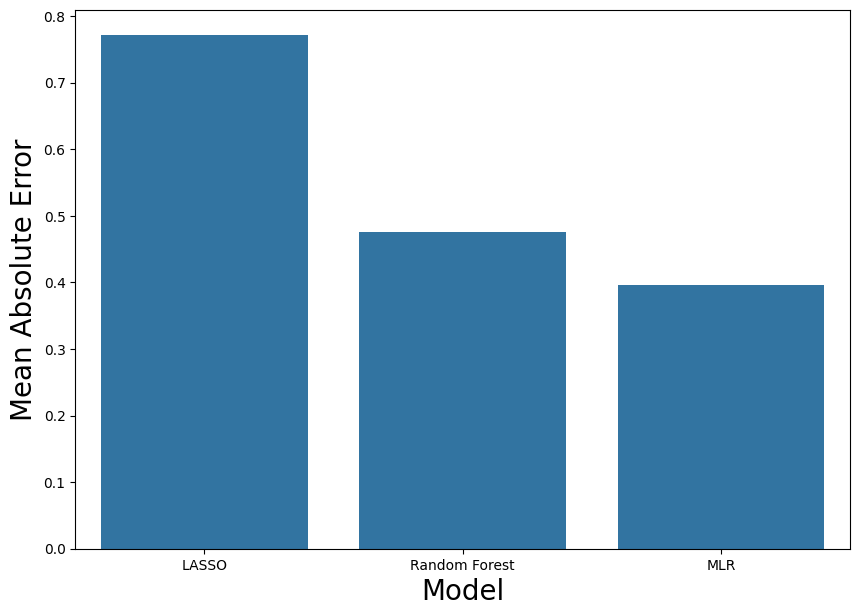

In [502]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()